<a href="https://colab.research.google.com/github/jyothi8203/CMU/blob/main/Recitation_HuggingFace.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hugging Face
- Provides a set of [tools](https://huggingface.co/docs) for utilizing pretrained models and deploying models (Hugging Face Spaces);
- Most known for its `transformers` library, an open-source NLP library that provides a wide range of pre-trained models for various NLP tasks such as text classification, question-answering, and language translation;
- Built on top of PyTorch and TensorFlow, and is designed to be easy to use and integrate into existing applications;
- Allows developers to fine-tune pre-trained models on their own data for specific tasks and domains, which can help improve model performance;
- Offers a cloud-based platform called Hugging Face Spaces, which allows developers to train and deploy custom NLP models without needing to manage their own infrastructure.

YouTube Tutorials: https://youtube.com/playlist?list=PLo2EIpI_JMQvWfQndUesu0nPBAtZ9gP1o&si=za98Eh9r-L6fjNRw

Understanding Transformers: https://jalammar.github.io/illustrated-transformer/

## Installation
Example installation: create a designated python environment, install Pytorch, then the required Hugging Face libararies.
```
conda create -n huggingface python=3.9
conda activate huggingface
conda install pytorch torchvision torchaudio -c pytorch     ##check pytorch installation for your system
pip install transformers[torch] datasets evaluate
pip install ipykernel
pip install scikit-learn
pip install accelerate -U
pip install peft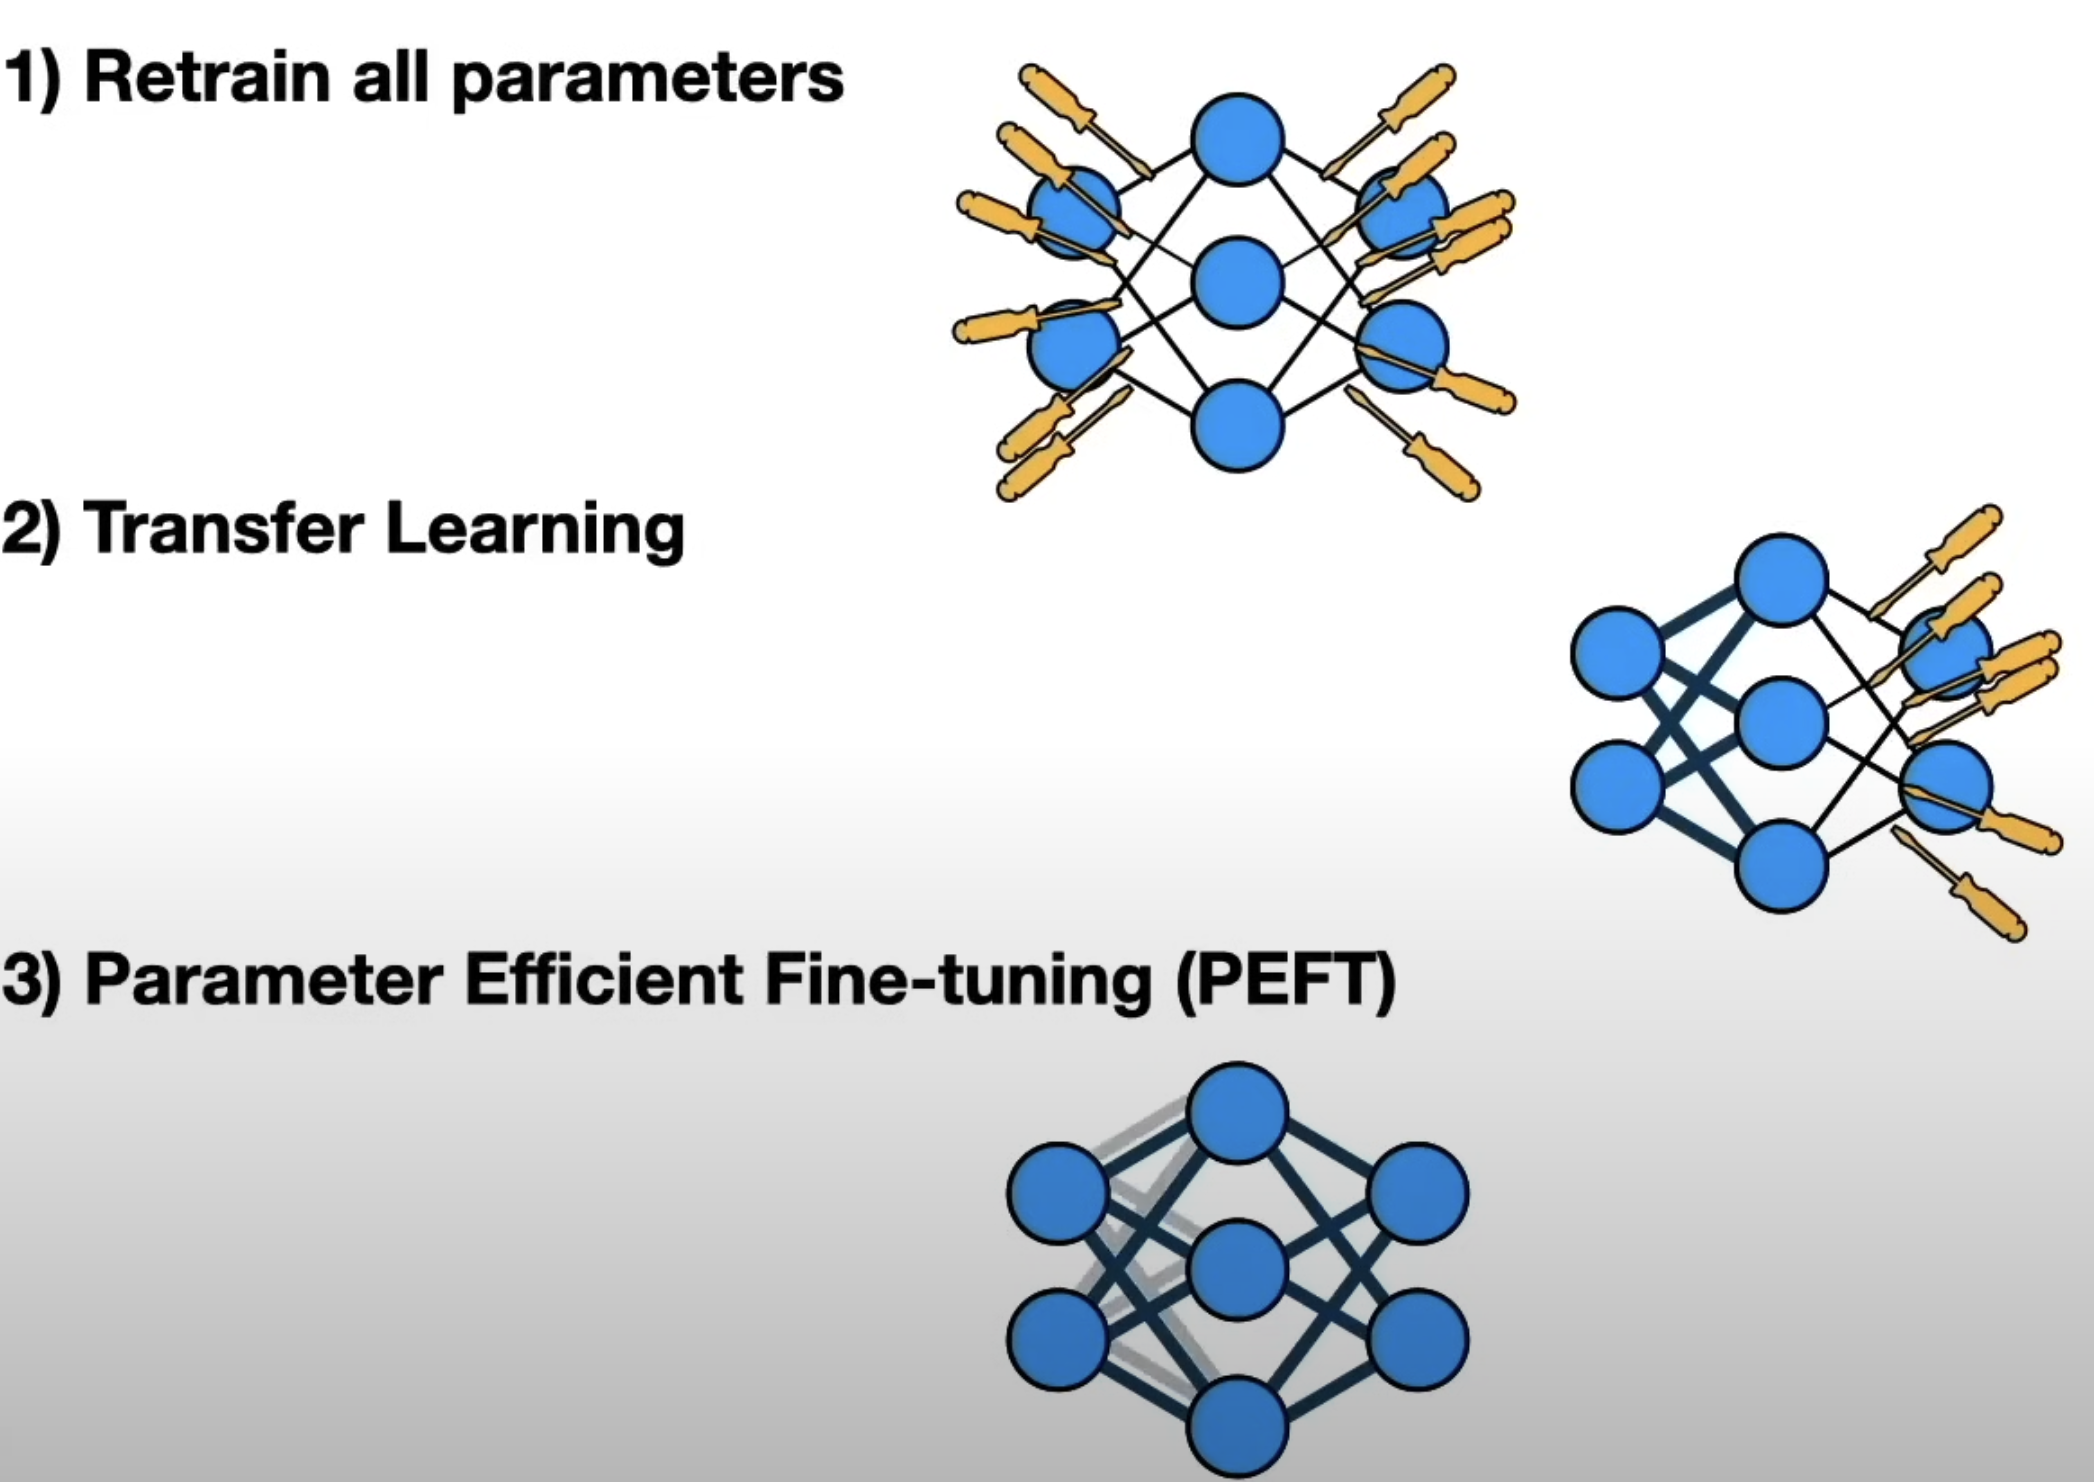
```

In [ ]:
  !pip install transformers[torch] datasets evaluate -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.6/297.6 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 388.9/388.9 kB 5.1 MB/s eta 0:00:00


In [ ]:
!pip install accelerate -U -q
# !pip install accelerate==0.28.0 -q

In [ ]:
!pip install peft -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.1/199.1 kB 6.0 MB/s eta 0:00:00


# Pipeline
The `pipeline()` function is pipeline for inferencing with pretrained models.


| **Task**                     | **Description**                                                                                              | **Modality**    | **Pipeline identifier**                       |
|------------------------------|--------------------------------------------------------------------------------------------------------------|-----------------|-----------------------------------------------|
| Text classification          | assign a label to a given sequence of text                                                                   | NLP             | pipeline(task=“sentiment-analysis”)           |
| Text generation              | generate text given a prompt                                                                                 | NLP             | pipeline(task=“text-generation”)              |
| Summarization                | generate a summary of a sequence of text or document                                                         | NLP             | pipeline(task=“summarization”)                |
| Image classification         | assign a label to an image                                                                                   | Computer vision | pipeline(task=“image-classification”)         |
| Image segmentation           | assign a label to each individual pixel of an image (supports semantic, panoptic, and instance segmentation) | Computer vision | pipeline(task=“image-segmentation”)           |
| Object detection             | predict the bounding boxes and classes of objects in an image                                                | Computer vision | pipeline(task=“object-detection”)             |
| Audio classification         | assign a label to some audio data                                                                            | Audio           | pipeline(task=“audio-classification”)         |
| Automatic speech recognition | transcribe speech into text                                                                                  | Audio           | pipeline(task=“automatic-speech-recognition”) |
| Visual question answering    | answer a question about the image, given an image and a question                                             | Multimodal      | pipeline(task=“vqa”)                          |
| Document question answering  | answer a question about a document, given an image and a question                                            | Multimodal      | pipeline(task="document-question-answering")  |
| Image captioning             | generate a caption for a given image                                                                         | Multimodal      | pipeline(task="image-to-text")                |


In [ ]:
from transformers import pipeline

In [ ]:
#easiest way to use pipeline for inferencing just needs a identifier name

classifier = pipeline('sentiment-analysis')
classifier('I really like the Neural Networks & Deep Learning course')

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


[{'label': 'POSITIVE', 'score': 0.999229907989502}]

In [ ]:
#pipeline also accepts a list of inputs

texts = ['I really like the Neural Networks & Deep Learning course', 'I enjoy programming too']
results = classifier(texts)
for result in results:
    print(result['label'], result['score'])

POSITIVE 0.999229907989502
POSITIVE 0.9995865225791931


In [ ]:
#easiest way to use pipeline for inferencing just needs a identifier name but specific model name can be added too

generator = pipeline('text-generation', model='gpt2')
generator('In the Neural Networks & Deep Learning course, we will teach you how to')

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': 'In the Neural Networks & Deep Learning course, we will teach you how to use neural networks at a much finer level. Then, in what I have referred to as an "informational approach", we will show how to program or predict the behavior'}]

# AutoClass
An [AutoClass](https://huggingface.co/docs/transformers/main/en/./model_doc/auto) is a shortcut that automatically retrieves the architecture of a pretrained model from its name or path. You only need to select the appropriate `AutoClass` for your task and it's associated preprocessing class.

## AutoTokenier
A tokenizer is responsible for preprocessing text into an array of numbers as inputs to a model. There are multiple rules that govern the tokenization process, including how to split a word and at what level words should be split (learn more about tokenization in the [tokenizer summary](https://huggingface.co/docs/transformers/main/en/./tokenizer_summary)). The most important thing to remember is you need to instantiate a tokenizer with the same model name to ensure you're using the same tokenization rules a model was pretrained with.

Load a tokenizer with [AutoTokenizer](https://huggingface.co/docs/transformers/main/en/model_doc/auto#transformers.AutoTokenizer).

In [ ]:
from transformers import AutoTokenizer

model_name = "nlptown/bert-base-multilingual-uncased-sentiment"
tokenizer = AutoTokenizer.from_pretrained(model_name)

In [ ]:
#convert text into tokens

encoding = tokenizer('I really like the Neural Networks & Deep Learning course. I enjoy programming too.')
print(encoding)

{'input_ids': [101, 151, 25165, 11531, 10103, 86165, 28310, 111, 15526, 19956, 13039, 119, 151, 61530, 23515, 14666, 119, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}


The tokenizer returns a dictionary containing:

* [input_ids](https://huggingface.co/docs/transformers/main/en/./glossary#input-ids): numerical representations of your tokens.
* [attention_mask](https://huggingface.co/docs/transformers/main/en/.glossary#attention-mask): indicates which tokens should be attended to.

A tokenizer can also accept a list of inputs, and padding and truncate the text to return a batch with uniform length:

In [ ]:
pt_batch = tokenizer(
    ['I really like the Neural Networks & Deep Learning course', 'I enjoy programming too'],
    padding='max_length',
    truncation=True,
    max_length=10,
    return_tensors='pt',)

print(pt_batch.input_ids.shape)

torch.Size([2, 10])


## AutoModel

`AutoModel` provides a simple and unified way to load pretrained instances. The only caveat is selecting the correct [AutoModel](https://huggingface.co/docs/transformers/main/en/model_doc/auto#transformers.AutoModel) for the task. For text (or sequence) classification, you should load [AutoModelForSequenceClassification](https://huggingface.co/docs/transformers/main/en/model_doc/auto#transformers.AutoModelForSequenceClassification).

In [ ]:
from transformers import AutoModelForSequenceClassification

model_name = "nlptown/bert-base-multilingual-uncased-sentiment"
pt_model = AutoModelForSequenceClassification.from_pretrained(model_name)

In [ ]:
#model outputs the final activations in the logits attribute

pt_outputs = pt_model(**pt_batch)
print(pt_outputs)

SequenceClassifierOutput(loss=None, logits=tensor([[-2.8190, -2.2110, -0.0799,  2.0080,  2.3176],
        [-2.6838, -2.1491,  0.1942,  1.9207,  2.0607]],
       grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)


In [ ]:
"""
All Hugging Face Transformers models output the tensors *before* the final activation
function (like softmax) because the final activation function is often fused with the loss
"""
from torch import nn

pt_predictions = nn.functional.softmax(pt_outputs.logits, dim=-1)
print(pt_predictions)

tensor([[0.0032, 0.0059, 0.0494, 0.3985, 0.5431],
        [0.0042, 0.0073, 0.0755, 0.4246, 0.4884]], grad_fn=<SoftmaxBackward0>)


Tieing it back to how we were doing things before for getting inference:

In [ ]:
#use a customized model and tokenizer in the pipeline function

from transformers import AutoTokenizer, AutoModelForSequenceClassification

#create the model and tokenizer

model_name = "nlptown/bert-base-multilingual-uncased-sentiment"
model = AutoModelForSequenceClassification.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)

#create a pipeline with customized model and tokenizer
classifier = pipeline('sentiment-analysis', model=model, tokenizer=tokenizer)

config.json:   0%|          | 0.00/953 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/669M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/872k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

In [ ]:
french_texts = ['Mon coeur est dans le travail', 'Mon coeur est dans les vacances']
results = classifier(french_texts)
for result in results:
    print(result['label'], result['score'])

5 stars 0.40999338030815125
5 stars 0.40597257018089294


Getting to know the key concepts of `pipeline`, `AutoTokenizer` and `AutoModel` prepares you to do inference with many pretrained models. See some of the[examples](https://colab.research.google.com/github/huggingface/education-toolkit/blob/main/03_getting-started-with-transformers.ipynb).

# Fine-tuning a pretrained model
There are 3 ways to do this,
1) is very inefficient and costly



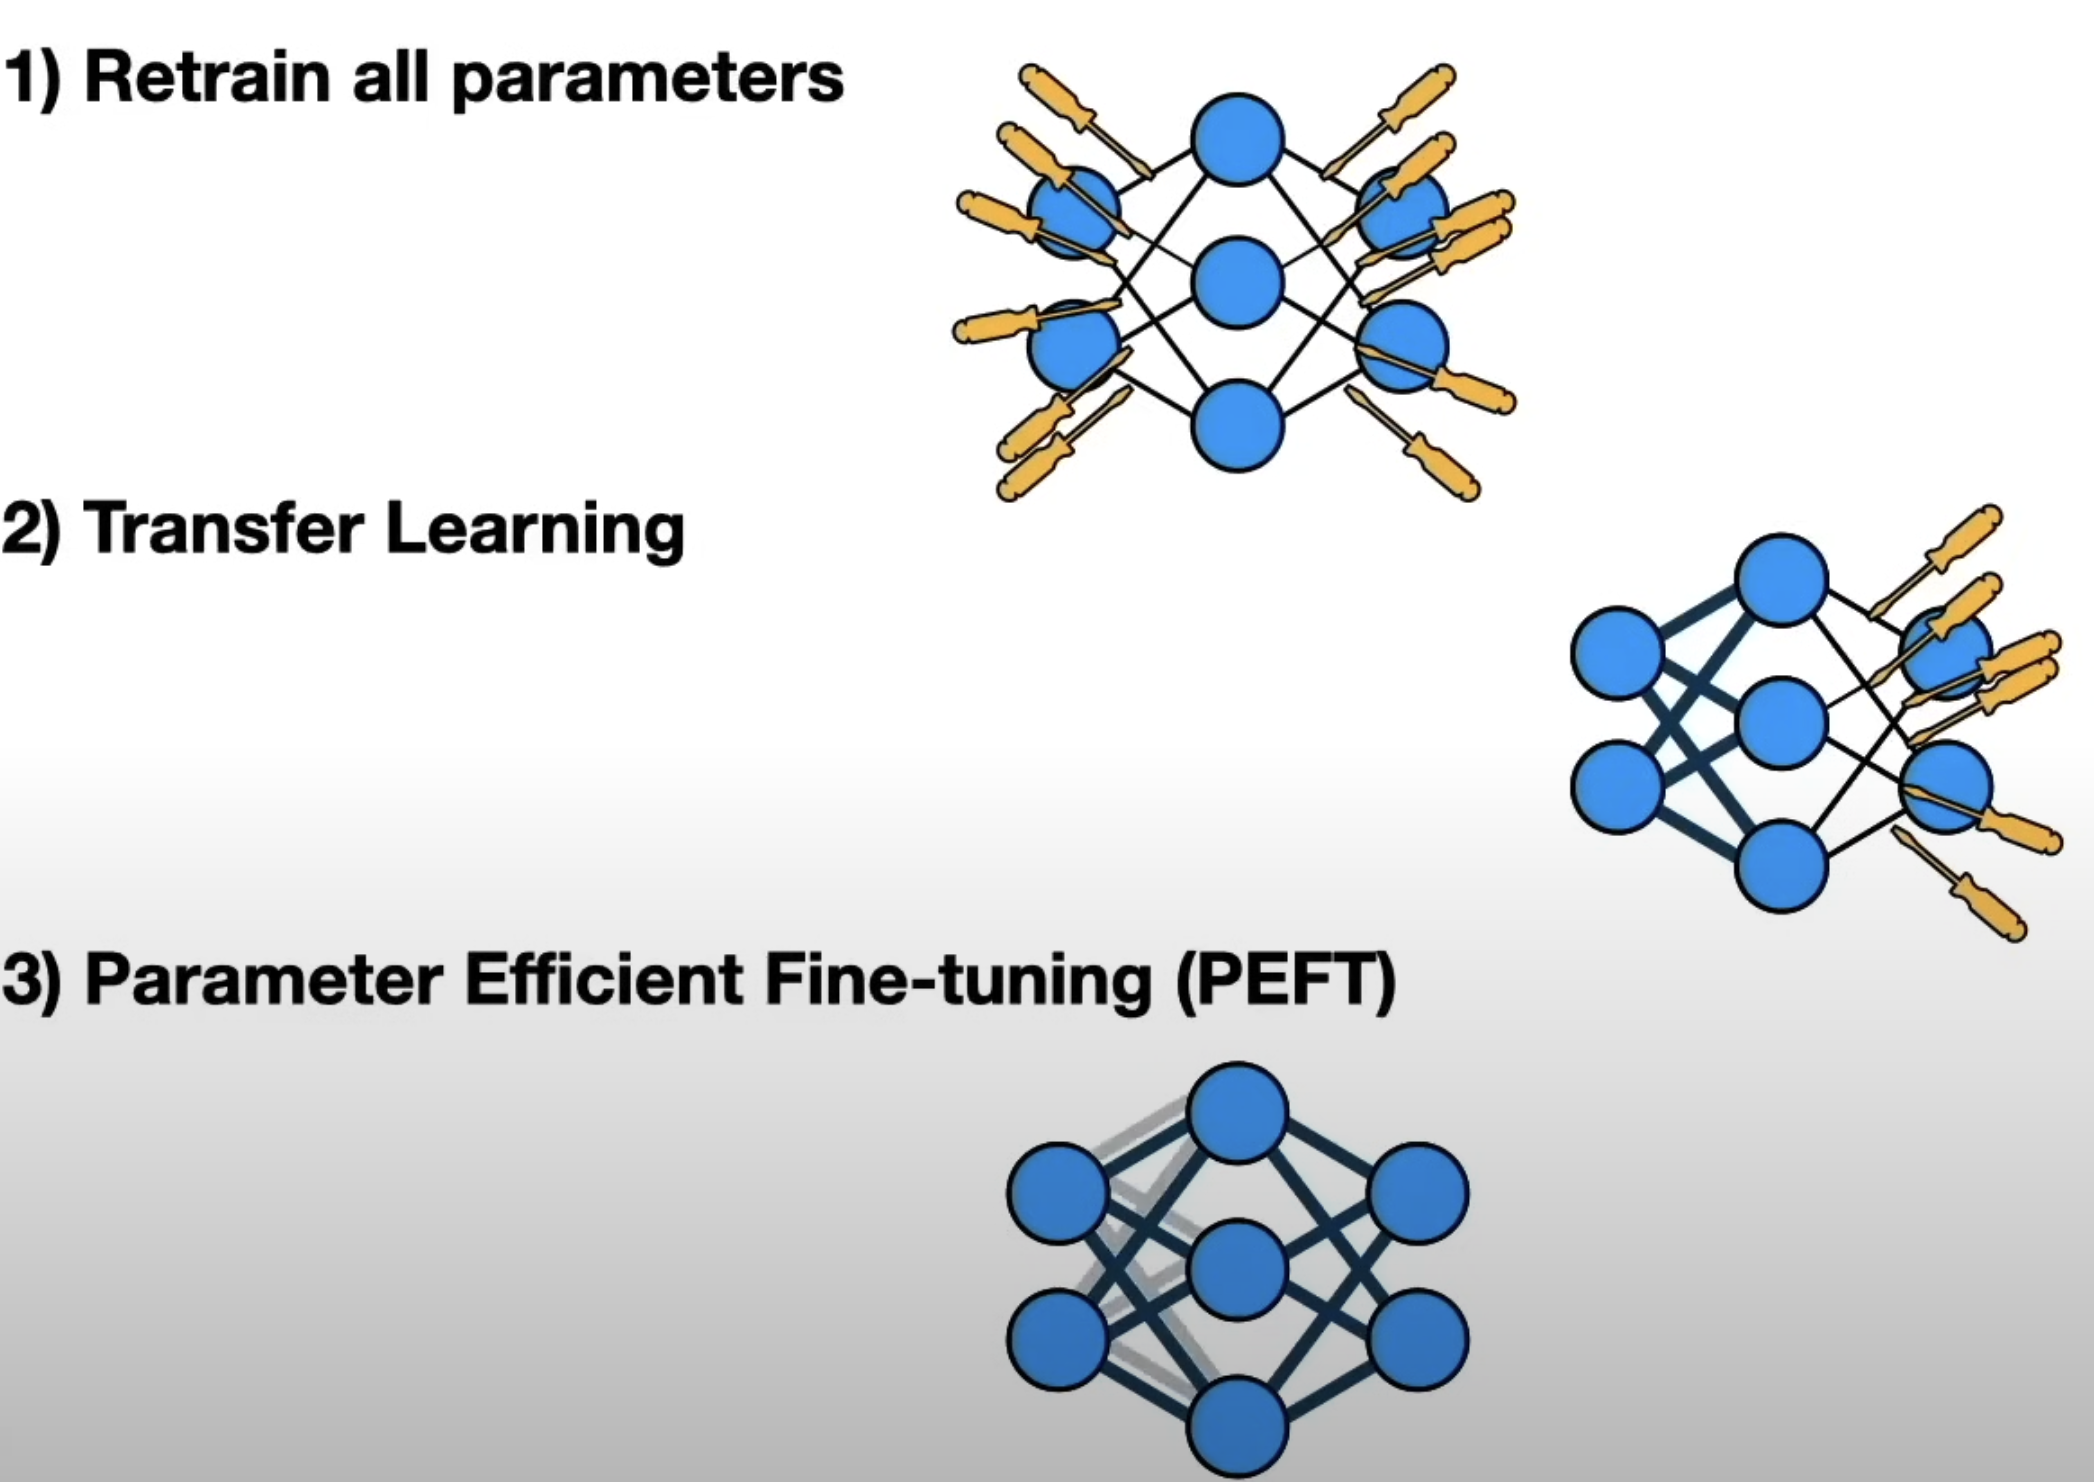


# 2) Transfer Learning

## Prepare a dataset

In [ ]:
from datasets import load_dataset

dataset = load_dataset('yelp_review_full')
dataset['train'][100]

Generating train split:   0%|          | 0/650000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/50000 [00:00<?, ? examples/s]

{'label': 0,
 'text': 'My expectations for McDonalds are t rarely high. But for one to still fail so spectacularly...that takes something special!\\nThe cashier took my friends\'s order, then promptly ignored me. I had to force myself in front of a cashier who opened his register to wait on the person BEHIND me. I waited over five minutes for a gigantic order that included precisely one kid\'s meal. After watching two people who ordered after me be handed their food, I asked where mine was. The manager started yelling at the cashiers for \\"serving off their orders\\" when they didn\'t have their food. But neither cashier was anywhere near those controls, and the manager was the one serving food to customers and clearing the boards.\\nThe manager was rude when giving me my order. She didn\'t make sure that I had everything ON MY RECEIPT, and never even had the decency to apologize that I felt I was getting poor service.\\nI\'ve eaten at various McDonalds restaurants for over 30 years. 

In [ ]:
train_subset = dataset['train'].select(range(500))
test_subset = dataset['test'].select(range(50))

In [ ]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained('bert-base-cased')

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

In [ ]:
def tokenize_function(examples):
    return tokenizer(examples['text'], padding='max_length', truncation=True)


small_train_dataset = train_subset.map(tokenize_function)
small_eval_dataset = test_subset.map(tokenize_function)

Map:   0%|          | 0/500 [00:00<?, ? examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

## Define the model

You will see a warning about some of the pretrained weights not being used and some weights being randomly initialized. Don’t worry, this is completely normal! The pretrained head of the BERT model is discarded, and replaced with a randomly initialized classification head. You will fine-tune this new model head on your sequence classification task, transferring the knowledge of the pretrained model to it.

In [ ]:
from transformers import AutoModelForSequenceClassification

model = AutoModelForSequenceClassification.from_pretrained("bert-base-cased", num_labels=5)

model.safetensors:   0%|          | 0.00/436M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


## Train with Hugging Face Trainer

In [ ]:
from transformers import TrainingArguments, Trainer
import torch
import numpy as np
import evaluate
import os

os.environ['CUDA_VISIBLE_DEVICES'] = '0'

Next, create a [TrainingArguments](https://huggingface.co/docs/transformers/main/en/main_classes/trainer#transformers.TrainingArguments) class which contains all the hyperparameters you can tune as well as flags for activating different training options. For this tutorial you can start with the default training [hyperparameters](https://huggingface.co/docs/transformers/main_classes/trainer#transformers.TrainingArguments), but feel free to experiment with these to find your optimal settings.


Specify where to save the checkpoints from your training. If you'd like to monitor your evaluation metrics during fine-tuning, specify the `evaluation_strategy` parameter in your training arguments to report the evaluation metric at the end of each epoch.

In [ ]:
training_args = TrainingArguments(output_dir='test_trainer', evaluation_strategy="epoch")

[Trainer](https://huggingface.co/docs/transformers/main/en/main_classes/trainer#transformers.Trainer) does not automatically evaluate model performance during training. You'll need to pass [Trainer](https://huggingface.co/docs/transformers/main/en/main_classes/trainer#transformers.Trainer) a function to compute and report metrics. The [🤗 Evaluate](https://huggingface.co/docs/evaluate/index) library provides a simple [`accuracy`](https://huggingface.co/spaces/evaluate-metric/accuracy) function you can load with the [evaluate.load](https://huggingface.co/docs/evaluate/main/en/package_reference/loading_methods#evaluate.load)

In [ ]:
metric = evaluate.load("accuracy")

Call `compute` on `metric` to calculate the accuracy of your predictions. Before passing your predictions to `compute`, you need to convert the logits to predictions (remember all 🤗 Transformers models return logits):

In [ ]:
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    return metric.compute(predictions=predictions, references=labels)

In [ ]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=small_train_dataset,
    eval_dataset=small_eval_dataset,
    compute_metrics=compute_metrics
)

In [ ]:
trainer.train()

## Save a model

Once your model is fine-tuned, you can save it with its tokenizer using [PreTrainedModel.save_pretrained()](https://huggingface.co/docs/transformers/main/en/main_classes/model#transformers.PreTrainedModel.save_pretrained):

In [ ]:
pt_save_directory = 'pt_saved_pretrianed'
tokenizer.save_pretrained(pt_save_directory)
model.save_pretrained(pt_save_directory)

When you are ready to use the model again, reload it with [PreTrainedModel.from_pretrained()](https://huggingface.co/docs/transformers/main/en/main_classes/model#transformers.PreTrainedModel.from_pretrained):

In [ ]:
model = AutoModelForSequenceClassification.from_pretrained(pt_save_directory, num_labels=5)

In [ ]:
isinstance(model, torch.nn.Module)

# 3) Fine-tuning w/ LoRA (PEFT)

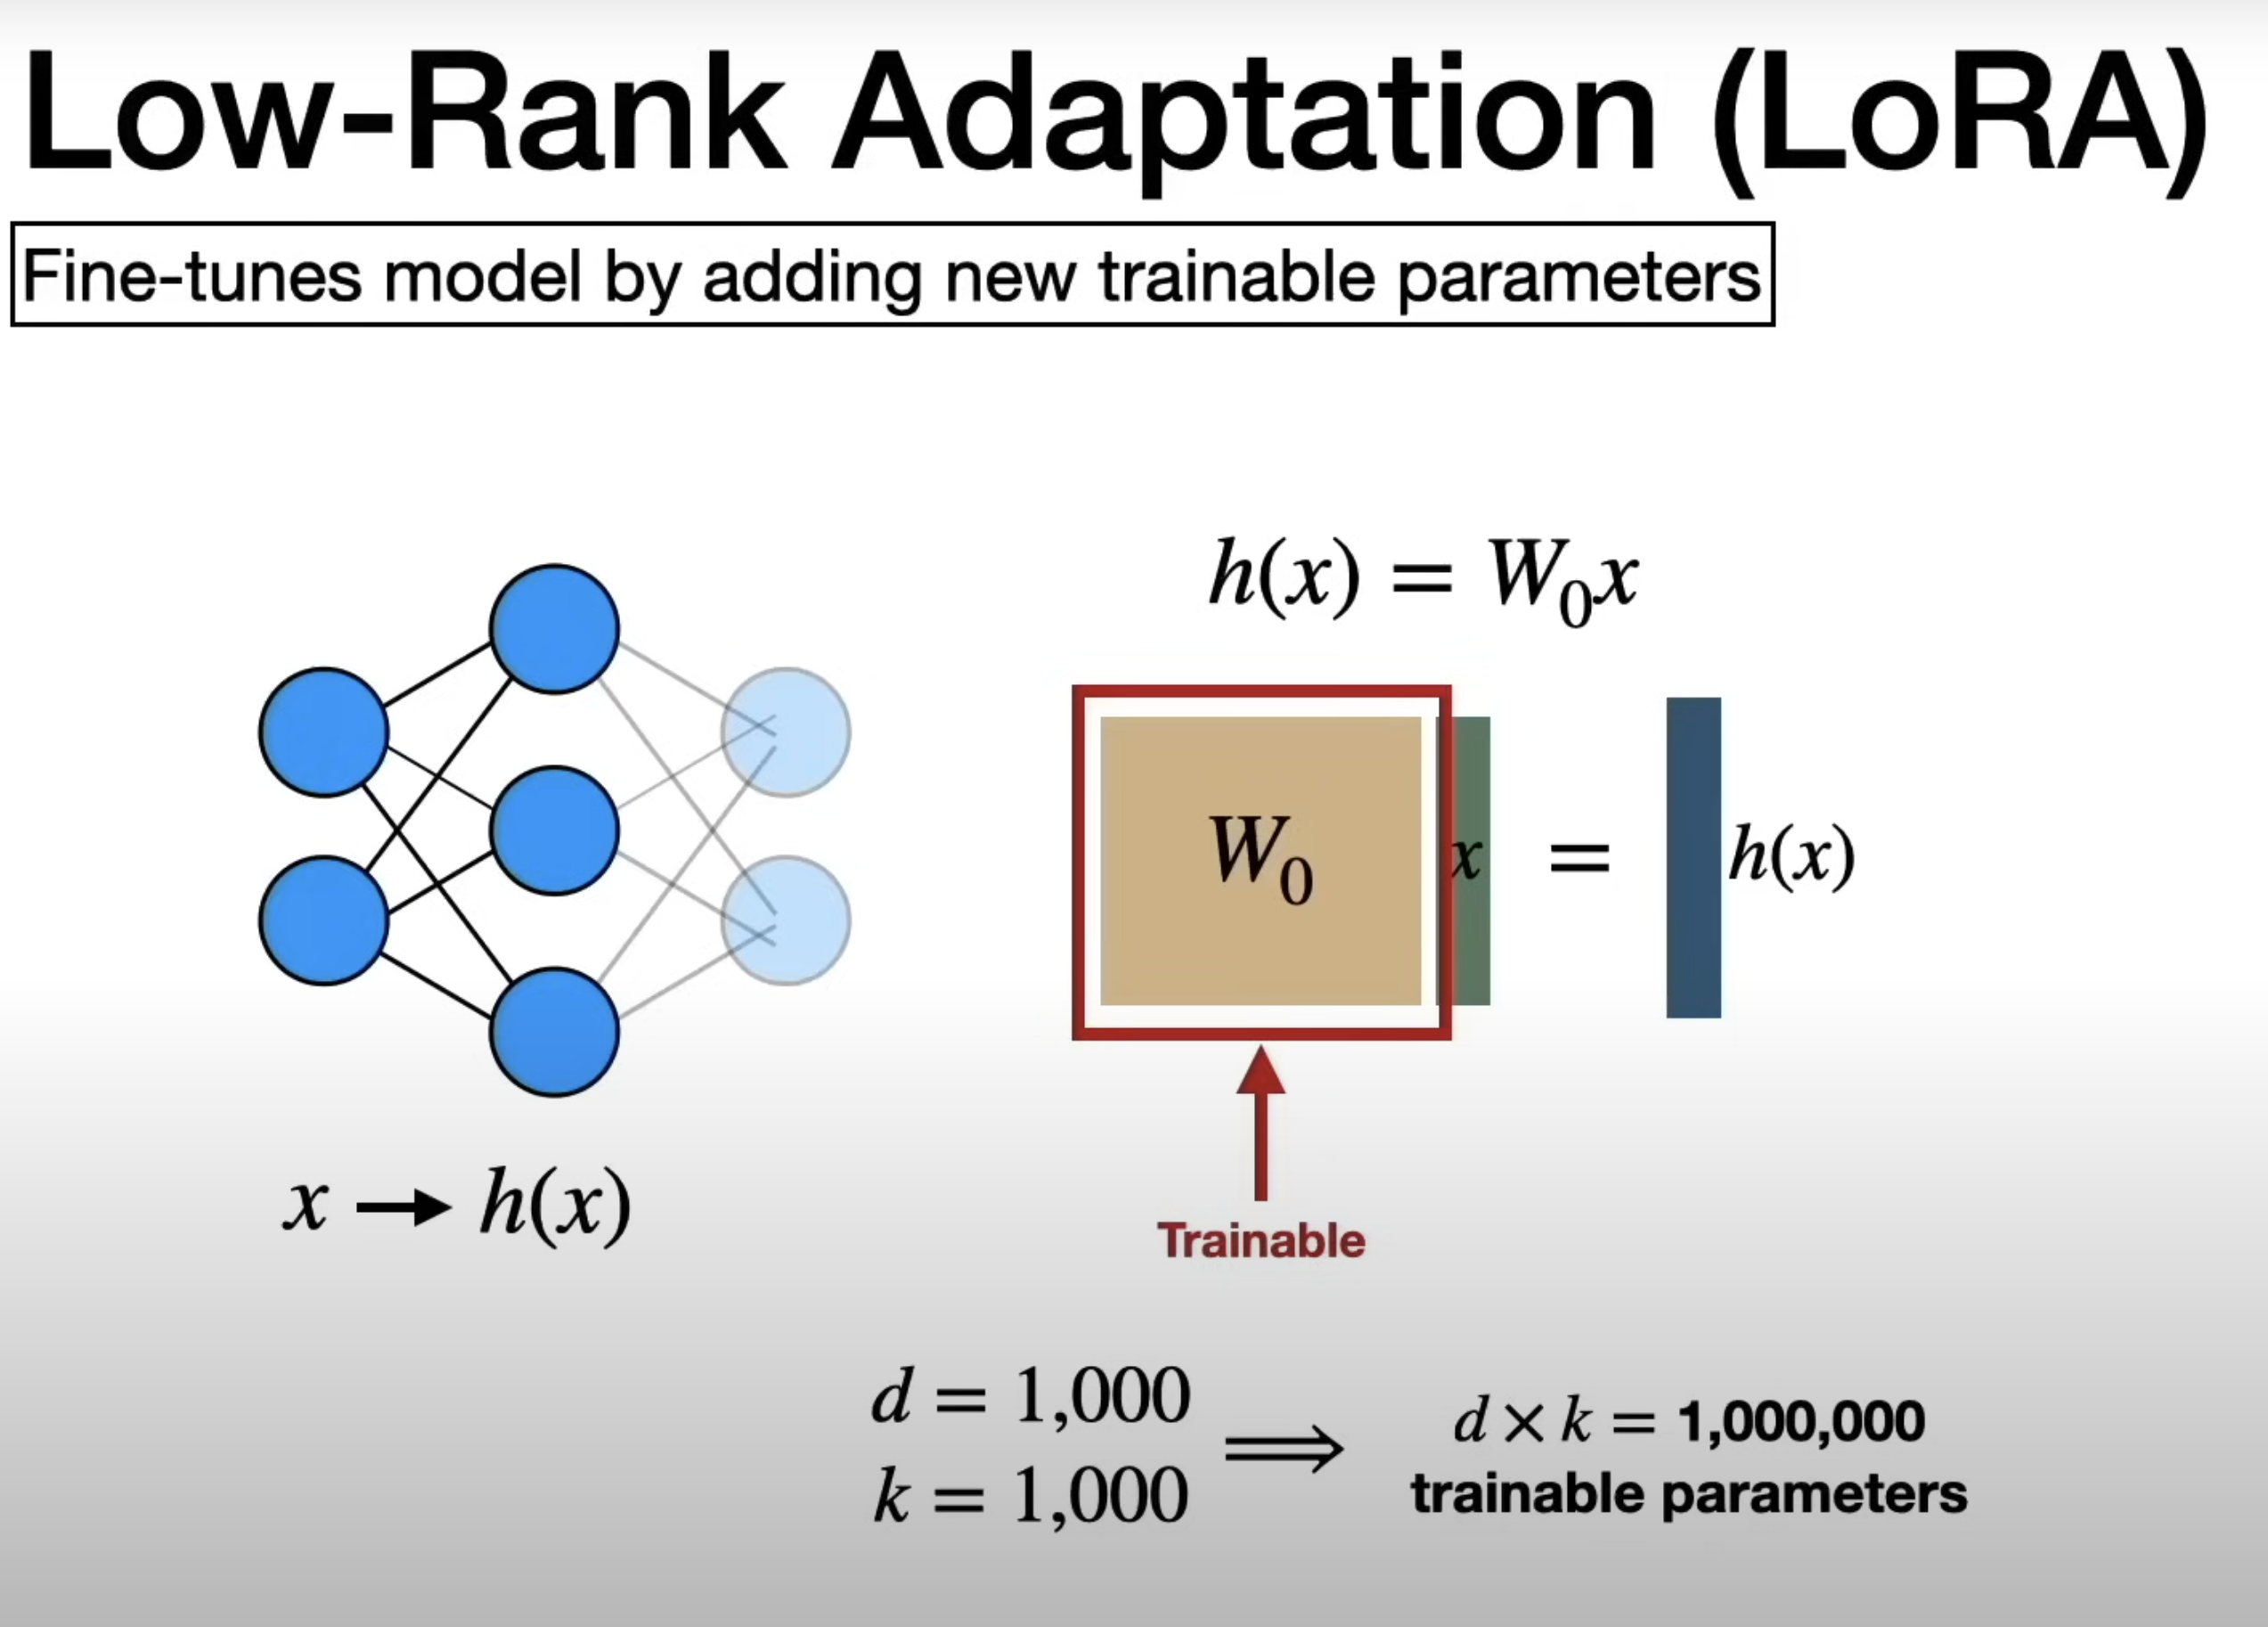

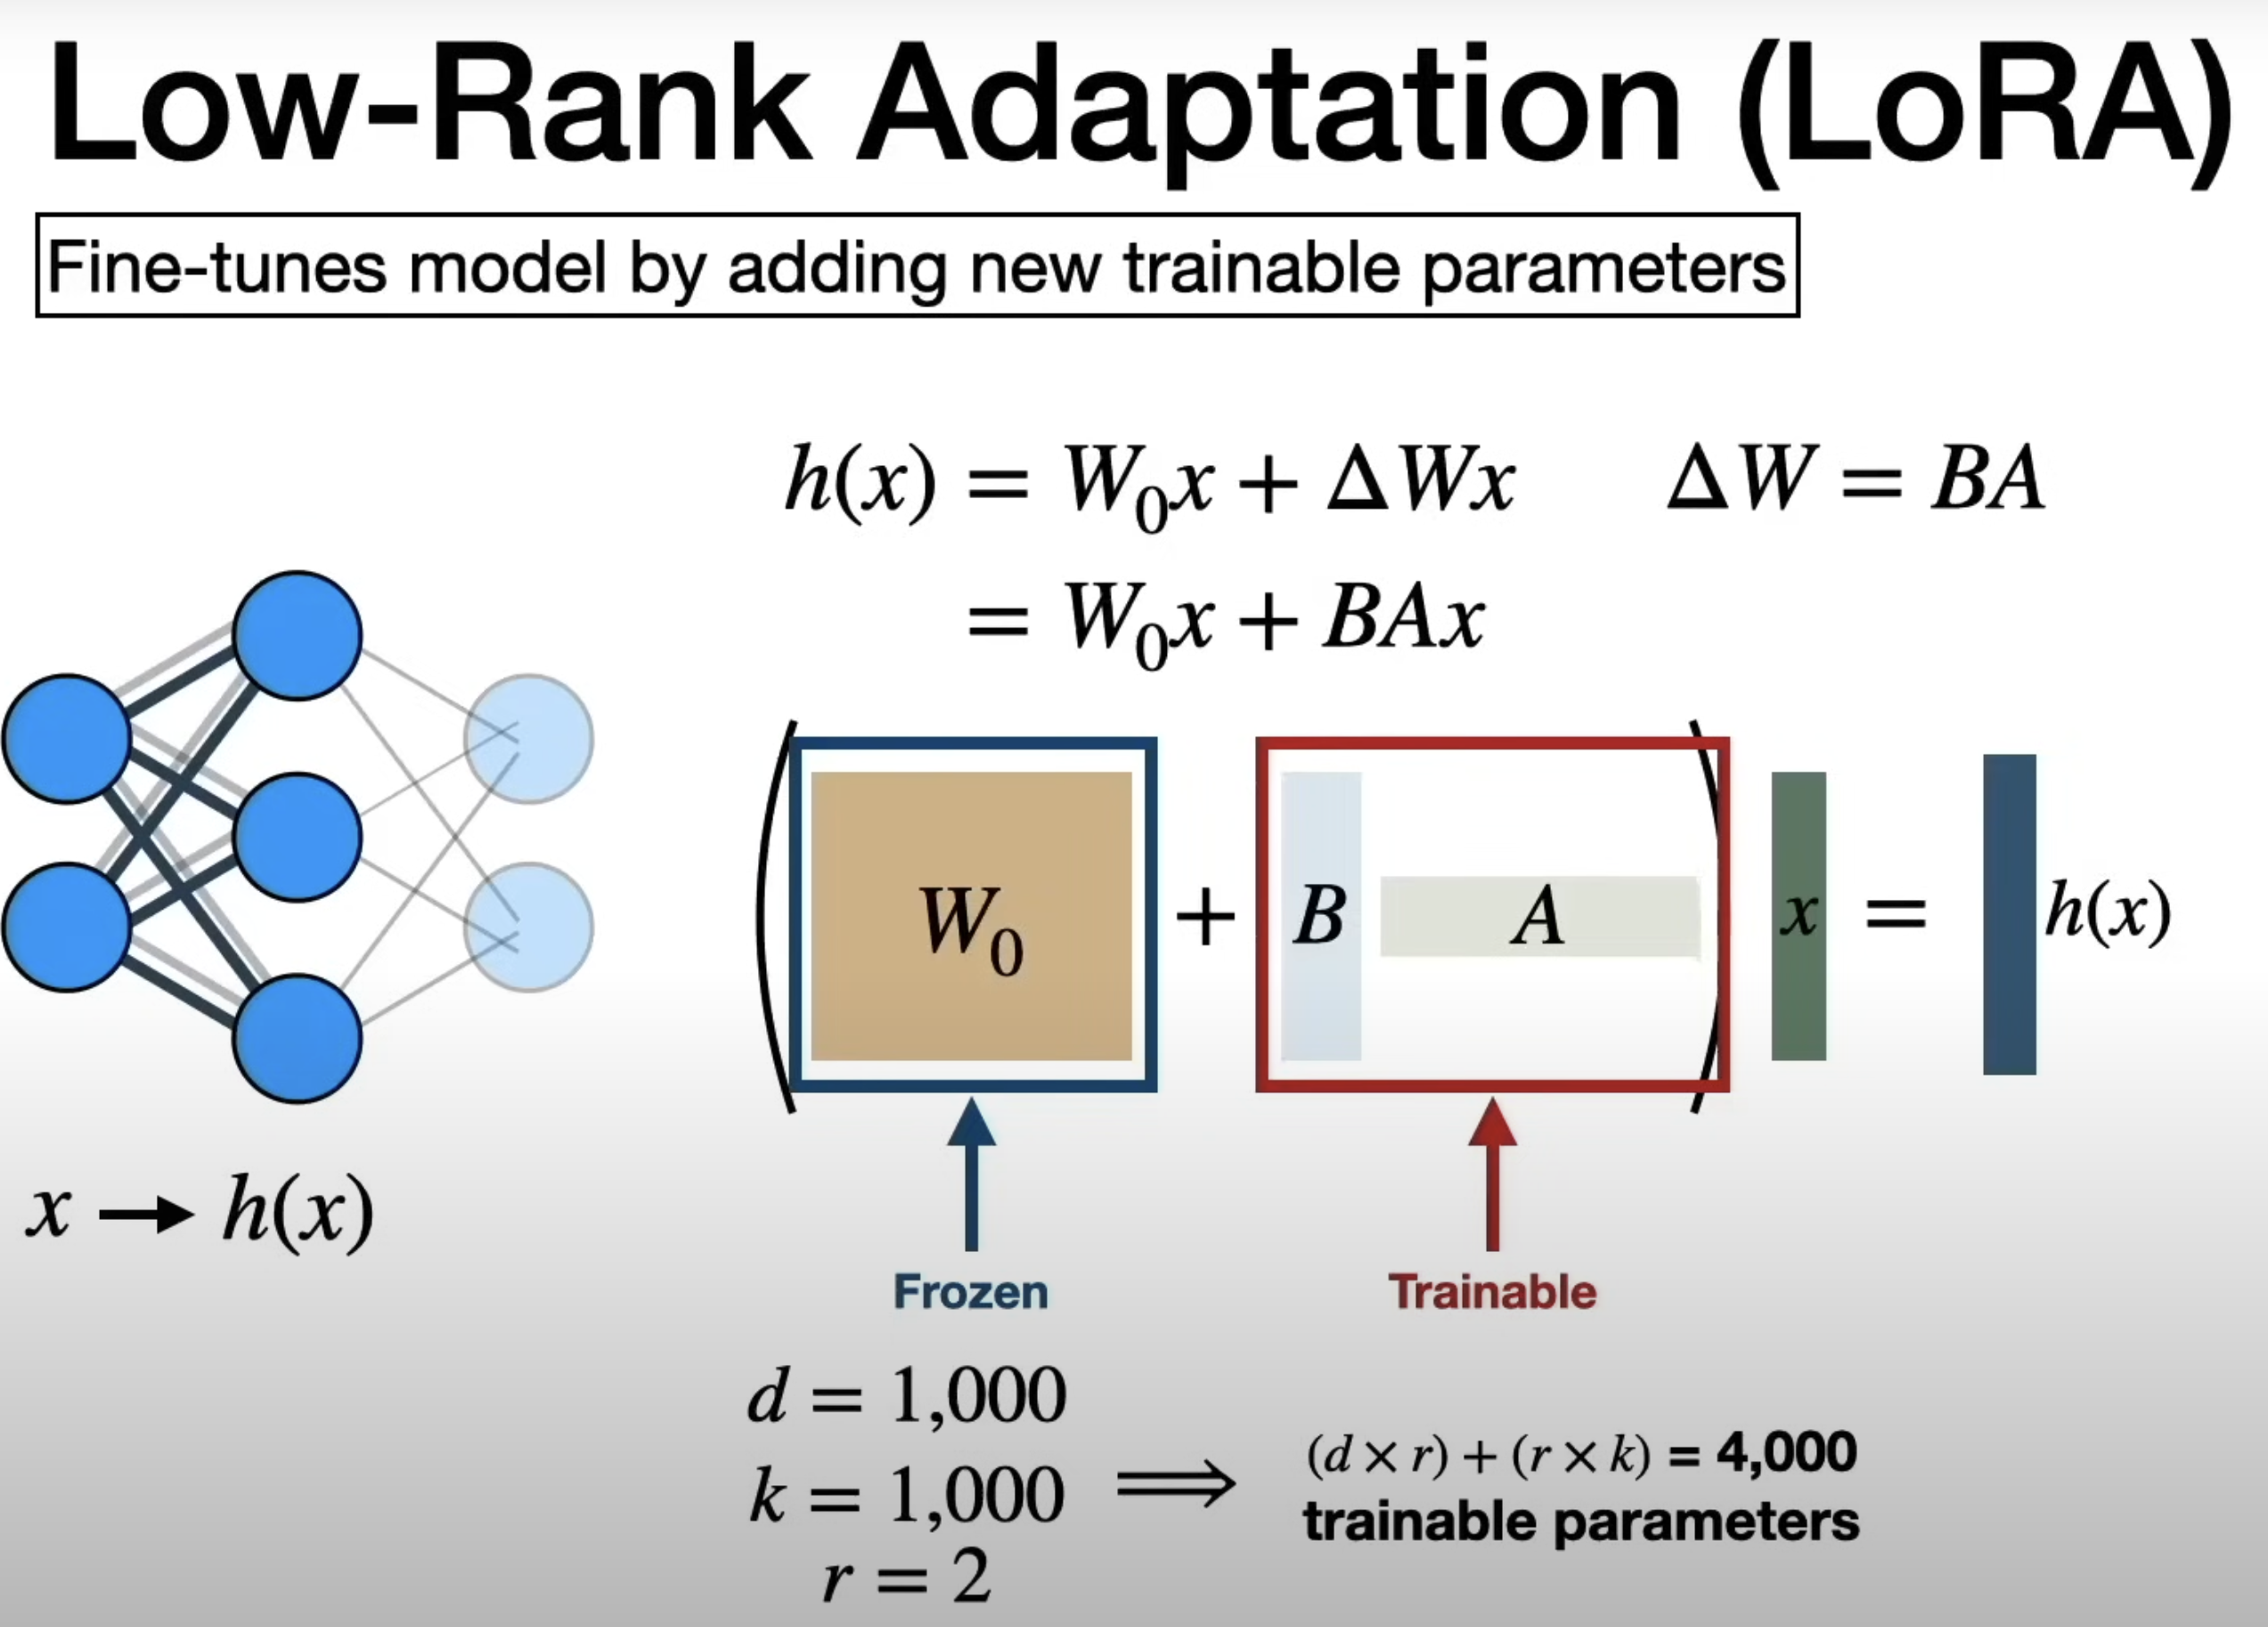

PEFT involves augmenting a base model with a relatively small number of trainable parameters. The key result of this is a fine-tuning methodology that demonstrates comparable performance to full parameter tuning at a tiny fraction of the computational and storage cost.

PEFT encapsulates a family of techniques, one of which is the popular LoRA (Low-Rank Adaptation) method.

### Imports

In [ ]:
from datasets import load_dataset, DatasetDict, Dataset

from transformers import (
    AutoTokenizer,
    AutoConfig,
    AutoModelForSequenceClassification,
    DataCollatorWithPadding,
    TrainingArguments,
    Trainer
)
from peft import PeftModel, PeftConfig, get_peft_model, LoraConfig
import evaluate
import torch
import numpy as np

### Base Model
Next, we load in our base model. The base model here is a relatively small one, but there are several other (larger) ones that we could have used (e.g. roberta-base, llama2, gpt2).

In [ ]:
model_checkpoint = 'distilbert-base-uncased'

# define label maps
id2label = {0: "Negative", 1: "Positive"}
label2id = {"Negative":0, "Positive":1}

# generate classification model from model_checkpoint
model = AutoModelForSequenceClassification.from_pretrained(
    model_checkpoint, num_labels=2, id2label=id2label, label2id=label2id)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


### Load Data

This is a dataset of 2000 movie reviews (1000 for training and 1000 for validation) with binary labels indicating whether the review is positive (or not).

In [ ]:
# load dataset
dataset = load_dataset("shawhin/imdb-truncated")
dataset

# dataset =
# DatasetDict({
#     train: Dataset({
#         features: ['label', 'text'],
#         num_rows: 1000
#     })
#     validation: Dataset({
#         features: ['label', 'text'],
#         num_rows: 1000
#     })
# })

Generating train split:   0%|          | 0/1000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/1000 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['label', 'text'],
        num_rows: 1000
    })
    validation: Dataset({
        features: ['label', 'text'],
        num_rows: 1000
    })
})

### Preprocess data

This consists of using a tokenizer to convert the text into an integer representation understood by the base model.

In [ ]:
# create tokenizer
tokenizer = AutoTokenizer.from_pretrained(model_checkpoint, add_prefix_space=True)

tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [ ]:
# create tokenize function
def tokenize_function(examples):
    # extract text
    text = examples["text"]

    #tokenize and truncate text
    tokenizer.truncation_side = "left"
    tokenized_inputs = tokenizer(
        text,
        return_tensors="np",
        truncation=True,
        max_length=512
    )

    return tokenized_inputs

# add pad token if none exists
if tokenizer.pad_token is None:
    tokenizer.add_special_tokens({'pad_token': '[PAD]'})
    model.resize_token_embeddings(len(tokenizer))

# tokenize training and validation datasets
tokenized_dataset = dataset.map(tokenize_function, batched=True)
tokenized_dataset

# tokenized_dataset =
# DatasetDict({
#     train: Dataset({
#        features: ['label', 'text', 'input_ids', 'attention_mask'],
#         num_rows: 1000
#     })
#     validation: Dataset({
#         features: ['label', 'text', 'input_ids', 'attention_mask'],
#         num_rows: 1000
#     })
# })

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['label', 'text', 'input_ids', 'attention_mask'],
        num_rows: 1000
    })
    validation: Dataset({
        features: ['label', 'text', 'input_ids', 'attention_mask'],
        num_rows: 1000
    })
})

In [ ]:
'''
At this point, we can also create a data collator, which will dynamically pad
examples in each batch during training such that they all have the same length.
This is computationally more efficient than padding all examples to be equal
in length across the entire dataset.
'''
# create data collator
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

### Evaluation

Here, we define the compute_metrics() function to compute the model’s accuracy.

In [ ]:
# import accuracy evaluation metric
accuracy = evaluate.load("accuracy")

# define an evaluation function to pass into trainer later
def compute_metrics(p):
    predictions, labels = p
    predictions = np.argmax(predictions, axis=1)

    return {"accuracy": accuracy.compute(predictions=predictions,
                                          references=labels)}

### Untrained Model Performance

Before training our model, we can evaluate how the base model with a randomly initialized classification head performs on some example inputs.

In [ ]:
# define list of examples
text_list = ["It was good.", "Not a fan, don't recommed.",
"Better than the first one.", "This is not worth watching even once.",
"This one is a pass."]

print("Untrained model predictions:")
print("----------------------------")
for text in text_list:
    # tokenize text
    inputs = tokenizer.encode(text, return_tensors="pt")
    # compute logits
    logits = model(inputs).logits
    # convert logits to label
    predictions = torch.argmax(logits)

    print(text + " - " + id2label[predictions.tolist()])

# Output:
# Untrained model predictions:
# ----------------------------
# It was good. - Negative
# Not a fan, don't recommed. - Negative
# Better than the first one. - Negative
# This is not worth watching even once. - Negative
# This one is a pass. - Negative

Untrained model predictions:
----------------------------
It was good. - Positive
Not a fan, don't recommed. - Positive
Better than the first one. - Positive
This is not worth watching even once. - Positive
This one is a pass. - Positive


### Fine-tuning with LoRA

In [ ]:
# This sets all the parameters for the LoRA algorithm.
peft_config = LoraConfig(task_type="SEQ_CLS", # sequence classification
                        r=4, # intrinsic rank of trainable weight matrix
                        lora_alpha=32, # this is like a learning rate
                        lora_dropout=0.01, # probablity of dropout
                        target_modules = ['q_lin']) # we apply lora to query layer only

In [ ]:
# We can then create a new version of our model that can be trained via PEFT.
# Notice that the scale of trainable parameters was reduced by about 100x.
model = get_peft_model(model, peft_config)
model.print_trainable_parameters()



trainable params: 628,994 || all params: 67,584,004 || trainable%: 0.9306847223789819


In [ ]:
# hyperparameters
lr = 1e-3 # size of optimization step
batch_size = 4 # number of examples processed per optimziation step
num_epochs = 10 # number of times model runs through training data

# define training arguments
training_args = TrainingArguments(
    output_dir= model_checkpoint + "-lora-text-classification",
    learning_rate=lr,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    num_train_epochs=num_epochs,
    weight_decay=0.01,
    evaluation_strategy="epoch",
    save_strategy="epoch",
    load_best_model_at_end=True,
)

In [ ]:
# creater trainer object
trainer = Trainer(
    model=model, # our peft model
    args=training_args, # hyperparameters
    train_dataset=tokenized_dataset["train"], # training data
    eval_dataset=tokenized_dataset["validation"], # validation data
    tokenizer=tokenizer, # define tokenizer
    data_collator=data_collator, # this will dynamically pad examples in each batch to be equal length
    compute_metrics=compute_metrics, # evaluates model using compute_metrics() function from before
)

# train model
trainer.train()


Trainer is attempting to log a value of "{'accuracy': 0.863}" of type <class 'dict'> for key "eval/accuracy" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.
Trainer is attempting to log a value of "{'accuracy': 0.857}" of type <class 'dict'> for key "eval/accuracy" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.
Trainer is attempting to log a value of "{'accuracy': 0.862}" of type <class 'dict'> for key "eval/accuracy" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.
Trainer is attempting to log a value of "{'accuracy': 0.89}" of type <class 'dict'> for key "eval/accuracy" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.
Trainer is attempting to log a value of "{'accuracy': 0.88}" of type <class 'dict'> for key "eval/accuracy" as a scalar. This inv

TrainOutput(global_step=2500, training_loss=0.13385463933944702, metrics={'train_runtime': 483.4694, 'train_samples_per_second': 20.684, 'train_steps_per_second': 5.171, 'total_flos': 1112883852759936.0, 'train_loss': 0.13385463933944702, 'epoch': 10.0})

### Trained Model Performance

In [ ]:
device = 'cuda'
model.to(device) # moving to mps for Mac or cuda (can alternatively do 'cpu')

print("Trained model predictions:")
print("--------------------------")
for text in text_list:
    inputs = tokenizer.encode(text, return_tensors="pt").to(device) # moving to mps for Mac (can alternatively do 'cpu')

    logits = model(inputs).logits
    predictions = torch.max(logits,1).indices

    print(text + " - " + id2label[predictions.tolist()[0]])

# Output:
# Trained model predictions:
# ----------------------------
# It was good. - Positive
# Not a fan, don't recommed. - Negative
# Better than the first one. - Positive
# This is not worth watching even once. - Negative
# This one is a pass. - Positive # this one is tricky


Trained model predictions:
--------------------------
It was good. - Positive
Not a fan, don't recommed. - Negative
Better than the first one. - Positive
This is not worth watching even once. - Negative
This one is a pass. - Negative


# Reference

- [Quick tour](https://huggingface.co/docs/transformers/main/en/quicktour)
- [Installation](https://huggingface.co/docs/transformers/main/en/installation)
- [Pipeline](https://huggingface.co/docs/transformers/main/en/pipeline_tutorial)
- [AutoClass](https://huggingface.co/docs/transformers/main/en/autoclass_tutorial)
- [Fine-tuning](https://huggingface.co/docs/transformers/main/en/training)
- [Education toolkit](https://github.com/huggingface/education-toolkit)
- [Finetuning](https://towardsdatascience.com/fine-tuning-large-language-models-llms-23473d763b91)